# Project 1.1: *Convergence of Sequences*

The purpose of this project is to develop a ***quick and dirty*** way of investigating the convergence of schemes under the condition that the *exact* solution is available.

As the text says, the general idea is to study how a method converges for a particular type of problem when the solution is known in order to guide us in learning how the scheme handles more delicate cases.

We are essentially dealing with what is known as the **method of manufactured solutions**,  a popular approach for code verification.

## Some Definitions and Notation

* **Convergence of Sequences**. Let $\{z_n\}\subset\mathbb{R}$ and $z\in\mathbb{R}$. We say that $\{z_n\}$ converges to $z$ if for every $\epsilon>0$ there exists an integer $N$ such that for all $n\geq N$, 
$$ \large |z_n-z| < \epsilon.$$
If $\{z_n\}$ converges to $z$, then we write either 
$$\large \lim_{n\to\infty} z_n=z, \ \text{ or more simply } \ z_n\to z.$$


* **Rate of Convergence**. Let $\{z_n\}\subset\mathbb{R}$ and $z\in\mathbb{R}$. We say that $z_n\to z$ with the rate $\alpha\in\mathbb{R}$ if there exists a constant $c\in\mathbb{R}$ (not depending on $n$) such that
$$ \large |z_n-z| \leq c\left(\frac{1}{n}\right)^\alpha. $$
If $\alpha=1$, we say that the rate of convergence is either first-order or linear.
If $\alpha=2$, we say that the rate of convergence is either second-order of quadratic.
You should get the idea for $\alpha > 2$.


* ***Superlinear Convergence***. We say that a sequence $\{z_n\}\subset\mathbb{R}$ converges superlinearly towards $z\in\mathbb{R}$ if there is a positive sequence of real numbers $\{c_n\}$ such that $c_n\to 0$ and $|z_n-z| \leq c_n/n$.


* ***The $O$-Notation ("Big-Oh" Notation)***. Let $\{y_n\}$ and $\{z_n\}$ be two sequences of positive real numbers. If there is a finite constant $c$, not depending on $n$, such that 
$$\large y_n \leq cz_n \ \ \ \forall \ n\geq 1,$$
we say that the sequence $\{y_n\}$ is of order $\{z_n\}$, and we write, 
$$\large y_n=O(z_n).$$

### Part (a): Estimating the rate of convergence for some sequences.

1. $z_n = \sqrt{1/n}$

2. $z_n = \sin(1/n)$

3. $z_n = \sqrt{1/n} \sin^2(1/n)$

4. $z_n = n(e^{(1/n)} - 1 - 1/n)$

We first must determine the limit, which is not always obvious. 
Plots are useful tools.
We therefore first make use of the ``numpy`` and ``matplotplib`` libraries to develop some intuition about these sequences.
Below, we proceed in the following steps:

  i. We import ``numpy`` and ``matplotlib`` (and also enable plotting within this notebook)
    
  ii. We generate plots of the sequences to help numerically "guess" at the limits (assuming they exist). Some of these are obvious, but others are less so.
    
  iii. Once we determine the appropriate limit $z$ in each case. We note that taking logarithms of both sides of the inequality in the definition of rate of convergence yields
    $$\large \ln |z_n-z| \leq \alpha \ln (c/n) = \alpha (\ln c + \ln (1/n)). $$
   Thus, we can perform regression using ``polyfit`` within ``numpy`` (see https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html for more info) to fit a line to the logarithm of $|z_n-z|$ and $1/n$ and take the slope of that line to get an estimate of the rate of convergence.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

/Users/Undertrick/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Step ii. First create parts of the sequences in the next two code blocks.

In [16]:
n = np.linspace(1,100,100) #generate an array from 1 to 100 of floats
print n

[   1.    2.    3.    4.    5.    6.    7.    8.    9.   10.   11.   12.
   13.   14.   15.   16.   17.   18.   19.   20.   21.   22.   23.   24.
   25.   26.   27.   28.   29.   30.   31.   32.   33.   34.   35.   36.
   37.   38.   39.   40.   41.   42.   43.   44.   45.   46.   47.   48.
   49.   50.   51.   52.   53.   54.   55.   56.   57.   58.   59.   60.
   61.   62.   63.   64.   65.   66.   67.   68.   69.   70.   71.   72.
   73.   74.   75.   76.   77.   78.   79.   80.   81.   82.   83.   84.
   85.   86.   87.   88.   89.   90.   91.   92.   93.   94.   95.   96.
   97.   98.   99.  100.]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96 

In [17]:
z1 = np.sqrt(1/n) #Seq. 1
z2 = np.sin(1./n) #Seq. 2
z3 = np.sqrt(1./n) * np.sin(1./n)**2 #Seq. 3
z4 = n * (np.exp(1./n) - 1 - 1./n) #Seq. 4

Step ii. Now plot the created sequences and infer the limits from the plots.

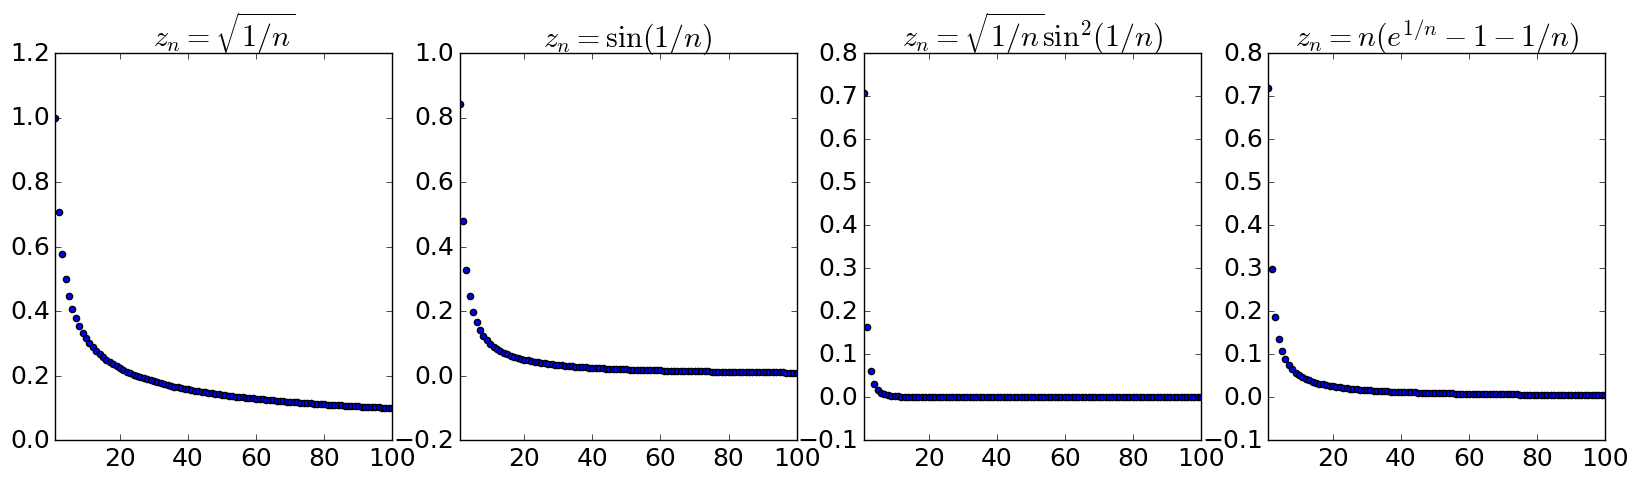

In [4]:
fig = plt.figure(1, figsize=(20,5)) #Make figure 1 size 5x20 

axes1 = fig.add_subplot(1, 4, 1) #1x4 array - subplot 1
axes2 = fig.add_subplot(1, 4, 2) #1x4 array - subplot 2
axes3 = fig.add_subplot(1, 4, 3) #1x4 array - subplot 3
axes4 = fig.add_subplot(1, 4, 4) #1x4 array - subplot 4

axes1.set_title('$z_n = \sqrt{1/n}$')
axes2.set_title('$z_n = \sin(1/n) $')
axes3.set_title('$z_n = \sqrt{1/n}\sin^2(1/n)$')
axes4.set_title('$z_n = n(e^{1/n} - 1 - 1/n)$')

axes1.set_xlim(1, 100)
axes2.set_xlim(1, 100)
axes3.set_xlim(1, 100)
axes4.set_xlim(1, 100)

axes1.scatter(n, z1)
axes2.scatter(n, z2)
axes3.scatter(n, z3)
axes4.scatter(n, z4)

Step iii. Use ``polyfit`` within ``numpy`` to determine the rate of convergence as discussed above.

In [5]:
z1_lim = 0.0 #Taken from previous plots
z2_lim = 0.0 #Taken from previous plots
z3_lim = 0.0 #Taken from previous plots
z4_lim = 0.0 #Taken from previous plots

z1_log = np.log(np.abs(z1 - z1_lim))
z2_log = np.log(np.abs(z2 - z2_lim))
z3_log = np.log(np.abs(z3 - z3_lim))
z4_log = np.log(np.abs(z4 - z4_lim))

line1_params = np.polyfit(np.log(1./n), z1_log, 1)
line2_params = np.polyfit(np.log(1./n), z2_log, 1)
line3_params = np.polyfit(np.log(1./n), z3_log, 1)
line4_params = np.polyfit(np.log(1./n), z4_log, 1)

print "[slope, intercept] log-log line fit for z1 = ", line1_params
print "[slope, intercept] log-log line fit for z2 = ", line2_params
print "[slope, intercept] log-log line fit for z3 = ", line3_params
print "[slope, intercept] log-log line fit for z4 = ", line4_params

[slope, intercept] log-log line fit for z1 =  [  5.00000000e-01   7.10542736e-16]
[slope, intercept] log-log line fit for z2 =  [ 0.98983053 -0.03977934]
[slope, intercept] log-log line fit for z3 =  [ 2.47966106 -0.07955868]
[slope, intercept] log-log line fit for z4 =  [ 1.03421047 -0.55095094]


Step iii. Create plots to visually confirm the rate of convergence.

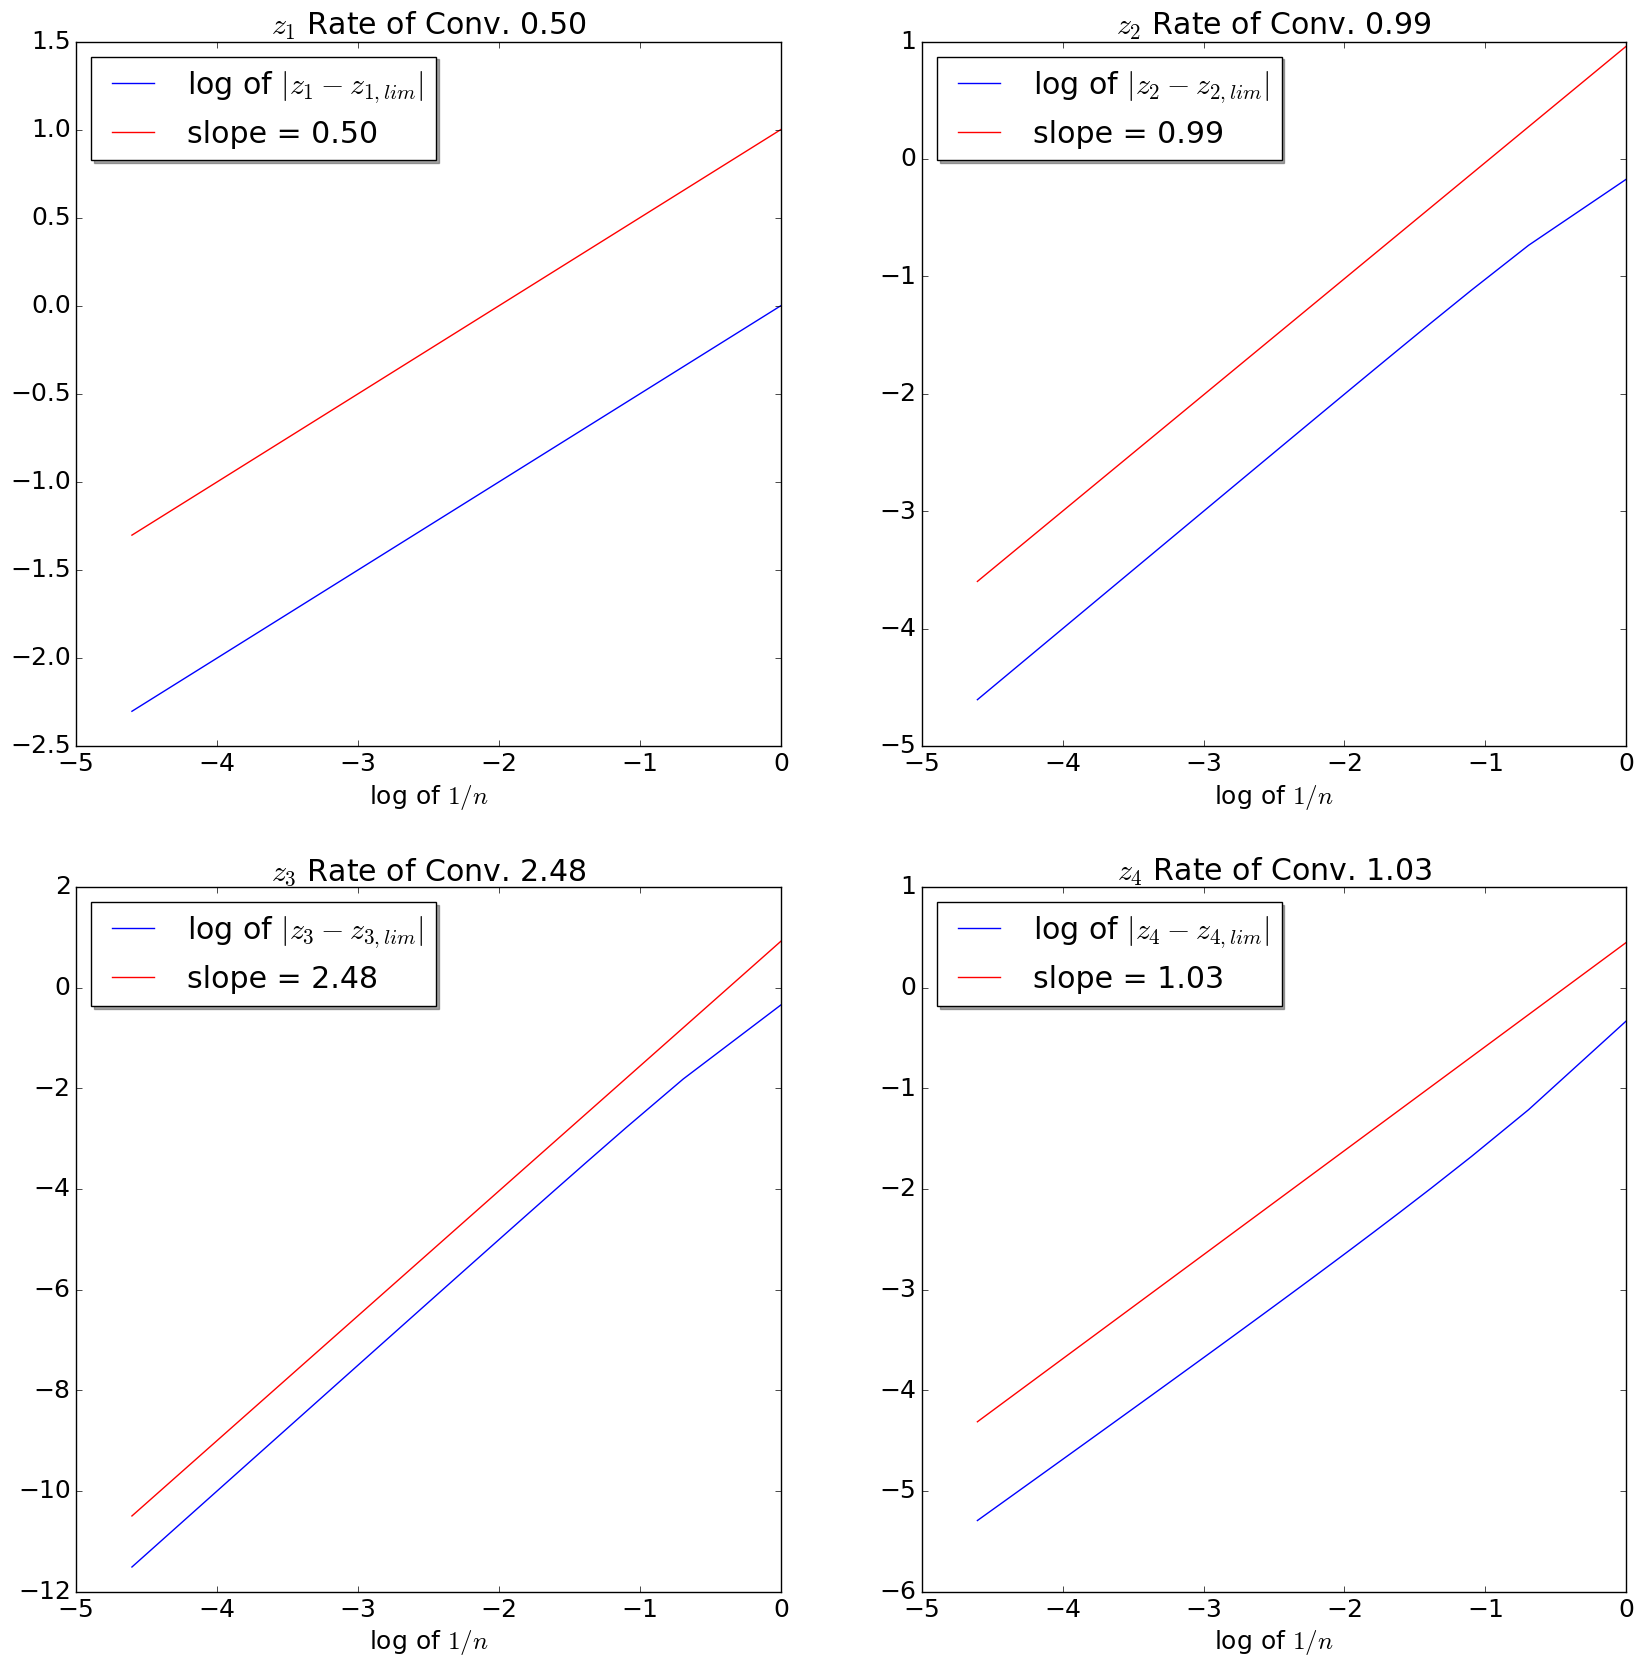

In [6]:
fig = plt.figure(2, figsize=(20,20))

axes1 = fig.add_subplot(2, 2, 1) #1x4 array - subplot 1
axes2 = fig.add_subplot(2, 2, 2) #1x4 array - subplot 2
axes3 = fig.add_subplot(2, 2, 3) #1x4 array - subplot 3
axes4 = fig.add_subplot(2, 2, 4) #1x4 array - subplot 4

axes1.plot(np.log(1./n), z1_log, label='log of $|z_1-z_{1,lim}|$')
slope_str = "{:1.2f}".format(line1_params[0]) 
axes1.plot(np.log(1./n), line1_params[0]*np.log(1./n)+line1_params[1]+1,
           'r', label='slope = ' + slope_str)
title_str = '$z_1$ Rate of Conv. ' + slope_str
axes1.set_title(title_str)
axes1.set_xlabel('log of $1/n$')
axes1.legend(loc='upper left', shadow=True)

axes2.plot(np.log(1./n), z2_log, label='log of $|z_2-z_{2,lim}|$')
slope_str = "{:1.2f}".format(line2_params[0]) 
axes2.plot(np.log(1./n), line2_params[0]*np.log(1./n)+line2_params[1]+1,
           'r', label='slope = ' + slope_str)
title_str = '$z_2$ Rate of Conv. ' + slope_str
axes2.set_title(title_str)
axes2.set_xlabel('log of $1/n$')
axes2.legend(loc='upper left', shadow=True)

axes3.plot(np.log(1./n), z3_log, label='log of $|z_3-z_{3,lim}|$')
slope_str = "{:1.2f}".format(line3_params[0]) 
axes3.plot(np.log(1./n), line3_params[0]*np.log(1./n)+line3_params[1]+1,
           'r', label='slope = ' + slope_str)

title_str = '$z_3$ Rate of Conv. ' + slope_str
axes3.set_title(title_str)
axes3.set_xlabel('log of $1/n$')
axes3.legend(loc='upper left', shadow=True)

axes4.plot(np.log(1./n), z4_log, label='log of $|z_4-z_{4,lim}|$')
slope_str = "{:1.2f}".format(line4_params[0])
axes4.plot(np.log(1./n), line4_params[0]*np.log(1./n)+line4_params[1]+1,
           'r', label='slope = ' + slope_str) 
title_str = '$z_4$ Rate of Conv. ' + slope_str
axes4.set_title(title_str)
axes4.set_xlabel('log of $1/n$')
axes4.legend(loc='upper left', shadow=True)


### Part (b): Linear or superlinear convergence?

1. $\large z_n = 1/n$

2. $\large z_n = \frac{1}{n\log(n)}$

3. $\large z_n = \frac{e^{1/n}}{n}$

From the definition, it is quite clear that only the second sequence converges superlinearly. 
However, as we will see below when we replace $n$ with $h=1/n$, the logarithm can make detecting this quite difficult (try playing with the ``offset`` as mentioned below).
Moreover, it is perhaps unclear from the text on how to numerically test for superlinear convergence. 
Basically, we are looking for an $\alpha$ that is somewhere between $1$ and $2$. 
It is a good idea to test this for fairly large values of $n$ to let asymptotics take over. 
You may only want to test the tail end of a sequence which numerically means testing a segment of the tail that is sufficiently far from the beginning.

Below, we can test with various values of ``offset`` to conclude that the second sequence is superlinear in convergence but the first and third are not even though for an ``offset=0`` we may erroneously conclude that the third sequence is superlinearly convergent.

In [7]:
offset = 1E3 

n = np.linspace(offset+1,offset+100,100)

z1 = 1./n
z2 = 1./((n+1)*np.log(n+1)) #This sequence must start at n=2 not n=1
z3 = np.exp(1./n)/(n)

z1_log = np.log(np.abs(z1))
z2_log = np.log(np.abs(z2))
z3_log = np.log(np.abs(z3))

line1_params = np.polyfit(np.log(1./n), z1_log, 1)
line2_params = np.polyfit(np.log(1./n), z2_log, 1)
line3_params = np.polyfit(np.log(1./n), z3_log, 1)

print "rate of conv. for z1 = ", line1_params[0]
print "rate of conv. for z2 = ", line2_params[0]
print "rate of conv. for z3 = ", line3_params[0]

rate of conv. for z1 =  1.0
rate of conv. for z2 =  1.1426496335
rate of conv. for z3 =  1.0009529354


### Part (c): Redux with $h=1/n$

When discretizing PDEs, we often let $h$ denote a spatial discretization parameter in a particular direction. 
If we use "regular" discretizations, then this means we specify a number of points in each direction to define a grid where the spacing of points in a particular direction is uniform, so then $h=1/n$. Thus, as $n\to\infty$, $h\to 0$, so all the definitions are easily changed by making the substitutions of $h$ for $1/n$ or $h\to 0$ for $n\to\infty$.
We now estimate the rates of convergence as $h\to 0$ for

1. $z_h = \sqrt{h}\sin(h)$

2. $z_h = \sqrt{h}\cos(h)$

3. $z_h = \sqrt{h} e^h$

In [8]:
h = 1./n

z1 = np.sqrt(h)*np.sin(h)
z2 = np.sqrt(h)*np.cos(h)
z3 = np.sqrt(h)*np.exp(h)

z1_log = np.log(np.abs(z1))
z2_log = np.log(np.abs(z2))
z3_log = np.log(np.abs(z3))

line1_params = np.polyfit(np.log(1./n), z1_log, 1)
line2_params = np.polyfit(np.log(1./n), z2_log, 1)
line3_params = np.polyfit(np.log(1./n), z3_log, 1)

print "rate of conv. for z1 = ", line1_params[0]
print "rate of conv. for z2 = ", line2_params[0]
print "rate of conv. for z3 = ", line3_params[0]

rate of conv. for z1 =  1.49999969717
rate of conv. for z2 =  0.499999091502
rate of conv. for z3 =  0.500952935403


### Part (d): Some basic analysis

When we discuss a smooth function, we basically mean 
> A smooth function is as smooth as we need it to be. In other words, it has as many derivatives as is required by the analysis.

What is shown here are simple finite difference formulas for estimating derivatives of a ***smooth*** function of a single variable. 
They are all derived via simple Taylor series expansions. 

1. $\large \frac{f(x+h) - f(x)}{h} = f'(x) + O(h)$

2. $\large \frac{f(x) - f(x-h)}{h} = f'(x) + O(h)$

3. $\large \frac{f(x+h) - f(x-h)}{2h} = f'(x) + O(h^2)$

4. $\large \frac{f(x+h) - 2f(x) + f(x-h)}{h^2} = f''(x) + O(h^2)$

I will only derive the first and third ones.

#### Derivation of 1.
By the Taylor series formula we have
\begin{eqnarray}
 f(x+h) &=& f(x) + f'(x)h + f''(x)\frac{h^2}{2} + O(h^3) \\
 \Rightarrow f(x+h) - f(x) &=& f'(x)h + f''(x)\frac{h^2}{2} + O(h^3) \\
 \Rightarrow \frac{f(x+h)-f(x)}{h} &=& f'(x) + + f''(x)\frac{h}{2} + \frac{O(h^3)}{h} \\
 \Rightarrow \frac{f(x+h) - f(x)}{h} &=& f'(x) + O(h) + O(h^2) \\
 \Rightarrow \frac{f(x+h) - f(x)}{h} &=& f'(x) + O(h) \ \Box
\end{eqnarray}

#### Derivation of 3.
By the Taylor series formula we have both
$$
 \large   f(x+h) = f(x) + f'(x)h + f''(x)\frac{h^2}{2} + f'''(x)\frac{h^3}{6}+O(h^4),
$$
and
$$
 \large   f(x-h) = f(x) - f'(x)h + f''(x)\frac{h^2}{2} - f'''(x)\frac{h^3}{6}+O(h^4).
$$
Then, we compute $f(x+h)-f(x-h)$ from which it follows that
$$
 \large   f(x+h) - f(x-h) = 2f'(x)h + f'''(x)\frac{h^3}{3} + h.o.t.
$$
and dividing by $2h$ to both sides gives the result. $\Box$

### Part (e): Now we're getting to the point. 

You may have wondered why all the sequences we have looked at so far have zero as the limit.
Well, we are almost exclusively pre-occupied with studying the convergence of a method, which means that the ***error should converge to zero as we refine the method***.

Thus, when we test a method, we often will **manufacture a solution** and use some norm to compute the error in a numerical approximation to the manufatured solution. 
If the method is worth using, then the error should converge to zero, and given a robust set of manufactured solutions, we may even be able to numerically estimate the rate of convergence. 

The numerics of this part of the problem are not really important. 
What is important is the idea and how it is explaining an approach based on using iterative refinements to estimate the rate of convergence. 
Previously, we used regression on the logarithm of multiple terms in a sequence that were cheap to evaluate.
When numerically solving a PDE, we often can only refine a mesh a few times due to computational constraints. 
Then, we would use an equation like (1.63) in the text to estimate the rate of convergence for some particular choices of $h$ values like those given.

Deriving (1.63) is quite easy, simply take the log of (1.62) and then compute the slope of the line through the two points for $h_1$ and $h_2$ (i.e., take the "rise" over the "run"). 
Then, use the rules of logarithms to rewrite differences in logs as the log of a ratio. 

We can easily test how using (1.63) compares to our regression results.

In [9]:
h_init = 1./100
h = h_init * np.array([1, 1./2, 1./2**2, 1./2**3])
print h

z1 = np.sqrt(h)*np.sin(h)

alpha = np.log(z1[1:-1]/z1[0:-2])/np.log(h[1:-1]/h[0:-2])
print alpha

[ 0.01     0.005    0.0025   0.00125]
[ 1.49998197  1.49999549]


### Part (f): Be careful out there kiddos.

What happens to $z_h = |h\log(h)|$ as $h\to 0$ (and it should be clear we really mean $h\downarrow 0$)? Does the limit even exist?
We rewrite $z_h$ and observe that the limit is a so-called indeterminate form
$$
 \large   z_h = \left|\frac{\log h}{1/h}\right| \to \frac{\infty}{\infty} \ \ \text{ as } h\to 0.
$$
We then recall a certain rule about hospitals from calculus to get
$$
 \large   \lim_{h\to 0} z_h = \lim_{h\to 0} \left|\frac{1/h}{-1/h^2}\right| = \lim_{h\to 0} |h| = 0
$$

Let's play with this numerically.

[  4.60517019e-02   2.64915868e-02   1.49786614e-02   8.35576466e-03
   4.61109932e-03   2.52215815e-03   1.12662519e-04   5.97157674e-05
   3.15501376e-05   1.76125658e-07   9.13680123e-08   2.94049254e-13
   1.50176696e-13]
[ 0.79772021  0.82262557  0.84206493  0.85766112  0.870452    0.89691584
  0.91582382  0.92046562  0.93561217  0.94684402  0.96027746]


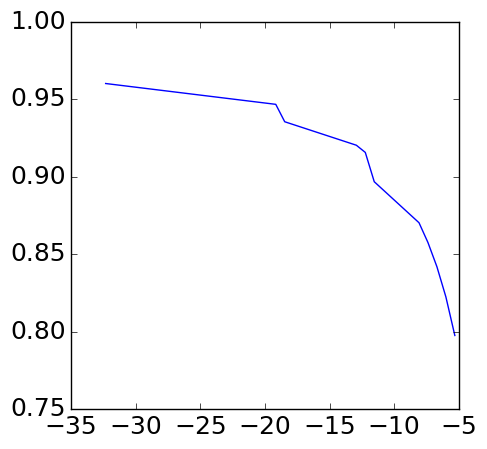

In [10]:
h_init = 1./100
h = h_init * np.array([1, 1./2, 1./2**2, 1./2**3, 1./2**4, 
                       1./2**5, 1./2**10, 1./2**11, 1./2**12,
                      1./2**20, 1./2**21, 1./2**40, 1./2**41])

z_lame = np.abs(h*np.log(h))
print z_lame

alpha = np.log(z_lame[1:-1]/z_lame[0:-2])/np.log(h[1:-1]/h[0:-2])
print alpha

fig = plt.figure(4, figsize=(5,5))
axes = fig.add_subplot(1, 1, 1)
axes.plot(np.log(h[1:-1]), alpha)

Um, what do we see? It looks like the ``alpha`` array is monotonically increasing as $h$ decreases to 0. It is not clear if there is numerically a good representative value of the rate of convergence $\alpha$. 

Another caution: let's look at evaluating the derivative of $f(x)=x^3$ via a central finite difference at $x=1$, namely 
$$ \large \frac{(1+h)^3-(1-h)^3}{2h} \approx 3, \quad  h\rightarrow 0 $$

From our finite difference estimate, this should be (at least) $\mathcal{O}(h^2)$

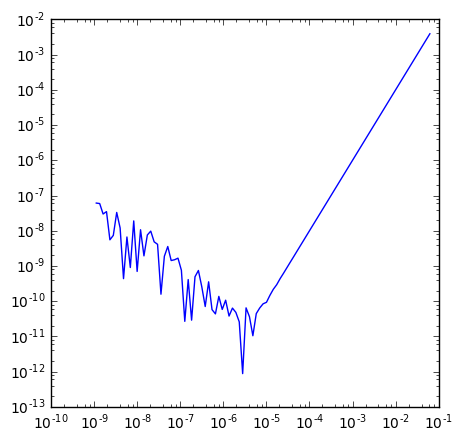

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def cent_diff(func,x,h):
    return (func(x+h)-func(x-h))/(2.0*h)

def xsqr(input):
    return (input**3)

    
temp=-np.linspace(4,30,100)
h=np.power(2.0,temp)
derapprox=cent_diff(xsqr,1.0,h)
err=np.absolute(3-derapprox)

fig = plt.figure(4, figsize=(5,5))
axes = fig.add_subplot(1, 1, 1)
plt.loglog(h,err)

#checking the alpha we get.
#alpha = np.log(err[1:-1]/err[0:-2])/np.log(h[1:-1]/h[0:-2])
#print alpha


For larger values of $h$, the central difference approximation exhibits the expected 2nd order convergence.

**Verify** this by computing values of $\alpha$(modify the above code block).

However, when $h\approx 10^{-5}$, the error actually starts to get worse.  This is caused by **floating point rounding error** in evaluating the central finite difference approximation. 

So if you are chasing convergence rates, be careful to take $h$ small, but not **too** small

### Part (g): Using Fourier series to estimate irrational numbers.

I am skipping most of this, but students should give all of these a try. 
I will do part (i).

(i) $\large z=\pi/4$ and $\large z_n=\sum_{j=0}^n \frac{(-1)^j}{2j+1}$

0.785398163397
[ 0.          1.          0.66666667  0.86666667  0.72380952  0.83492063
  0.74401154  0.82093462  0.75426795  0.81309148  0.7604599   0.80807895
  0.76460069  0.80460069  0.76756365  0.80204641  0.76978835  0.80009138
  0.77151995  0.79854698  0.77290595  0.7972962   0.77404038  0.7962626
  0.77498601  0.79539417  0.77578633  0.79465425  0.77647243  0.79401629
  0.77706714  0.79346058  0.77758757  0.79297218  0.77804681  0.79253956
  0.77845506  0.79215369  0.77882035  0.79180737  0.77914914  0.79149482
  0.77944663  0.79121133  0.77971708  0.79095303  0.77996402  0.79071671
  0.78019039  0.79049967  0.78039866  0.79029965  0.78059092  0.79011472
  0.78076893  0.78994324  0.78093423  0.78978379  0.78108814  0.78963515
  0.78123179  0.78949625  0.78136617  0.78936617  0.78149215  0.78924409
  0.7816105   0.7891293   0.78172189  0.78902116  0.78182692  0.78891912
  0.78192611  0.78882266  0.78201994  0.78873135  0.78210883  0.78864478
  0.78219317  0.78856259  0.78227329 

/Users/Undertrick/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log
/Users/Undertrick/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in divide
/Users/Undertrick/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:21: RuntimeWarning: divide by zero encountered in divide


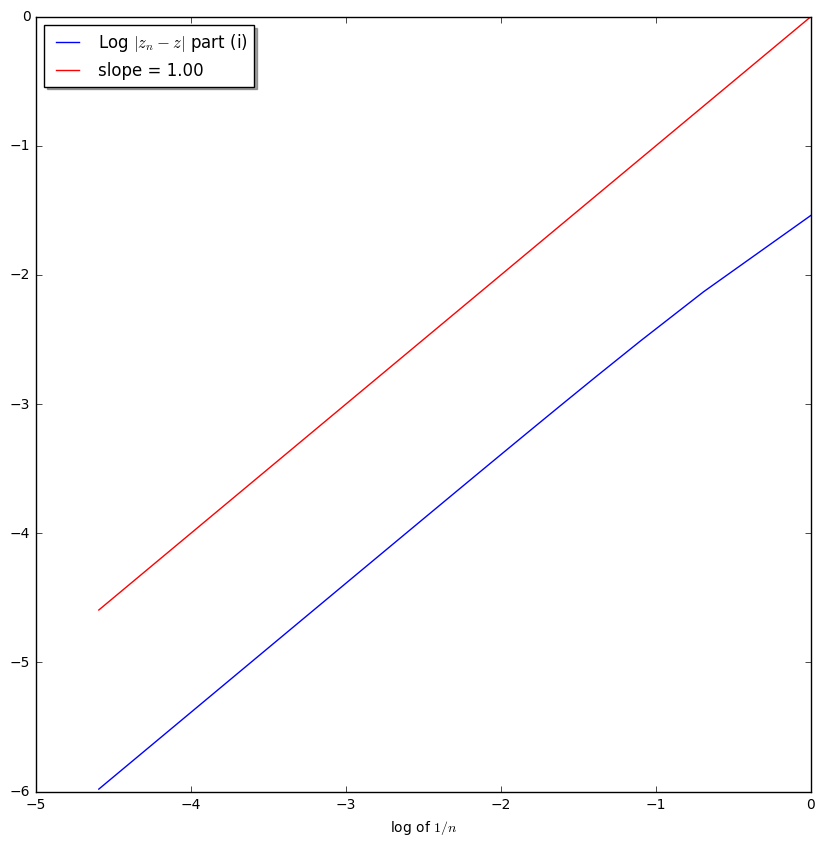

In [18]:
N = 100
n = np.linspace(0,99,N)
z_n = np.zeros(N)
z = np.pi/4
for k in n.astype('int'):
    for j in range(0,k):
        z_n[k] += (-1.)**j/(2*j+1)

print z
print z_n

e_n = np.abs(z-z_n)

alpha = np.log(e_n[1:-1]/e_n[0:-2])/np.log(n[0:-2]/n[1:-1]) # Note the switch in the denominator b/c h=1/n
print alpha

fig = plt.figure(4, figsize=(10,10))
axes = fig.add_subplot(1, 1, 1)
axes.plot(np.log(1./n), np.log(e_n), label='Log $|z_n-z|$ part (i)')
slope_str = "{:1.2f}".format(alpha[-1])
axes.plot(np.log(1./n), alpha[-1]*np.log(1./n),
           'r', label='slope = ' + slope_str)
axes.set_xlabel('log of $1/n$')
axes.legend(loc='upper left', shadow=True)